![header](https://drive.google.com/uc?export=view&id=1KuEspEp7OwqGw6uMRJvYE6BVE-Zo-8JF)

 <h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Se cargan las bibliotecas necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
     
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
     
from keras.models import Model

np.random.seed(0)

2024-06-08 16:27:08.426114: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Se carga el dataset y se verifica el número de muestras en cada set
### Nótese que al hacer la carga, se genera automáticamente el set de entrenamiento y el set de pruebas
### Las imágenes son a color y de 32 por 32 pixeles

# Se verifica el número de muestras por objeto

In [2]:
import os
data_dir = 'Signals_Dataset'
train_path = 'Signals_Dataset/Train'
test_path = 'Signals_Dataset/Test'

IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [3]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at the next intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'VVehicles over 3.5 metric tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End of all speed and passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End of no passing by vehicles over 3.5 metric tons' }

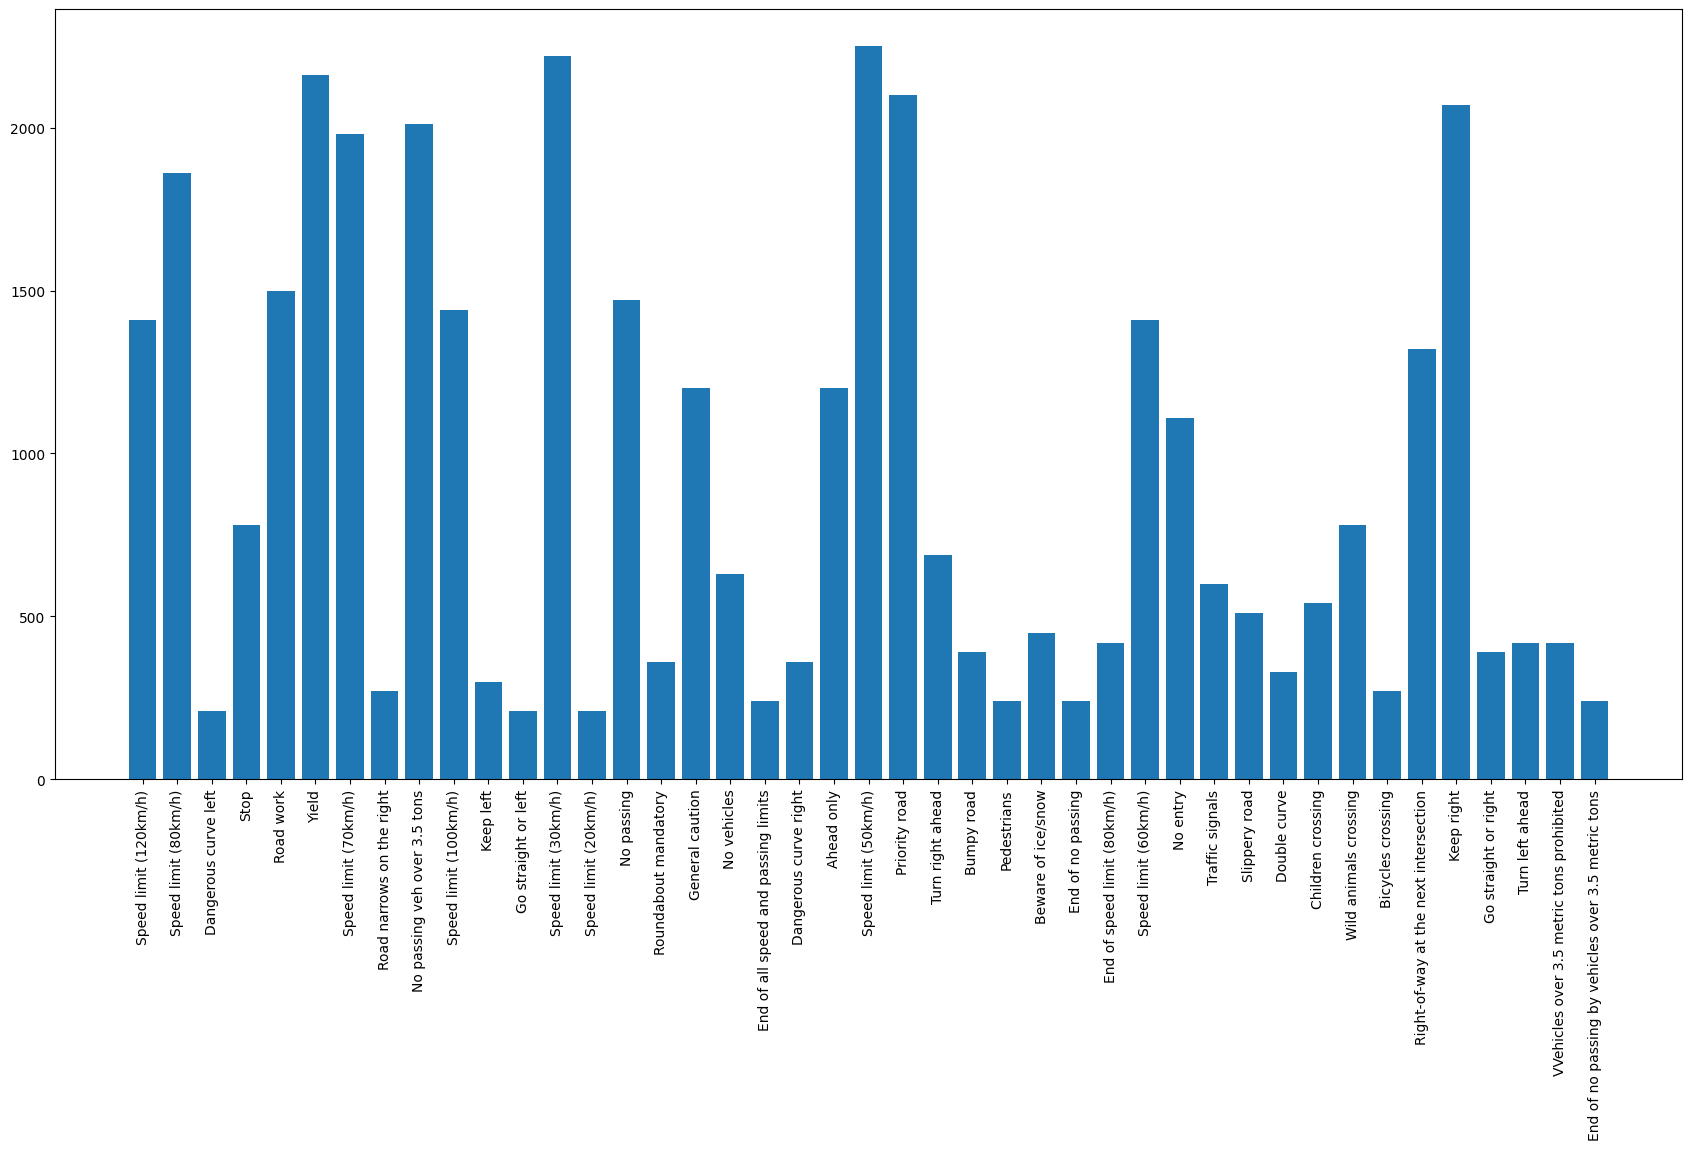

In [4]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
tuples = zip(*zipped_lists)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [5]:
import cv2 
from PIL import Image
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            if ".png" in img:
                image = cv2.imread(path + '/' + img)
                image_fromarray = Image.fromarray(image, 'RGB')
                resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
                image_data.append(np.array(resize_image))
                image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 32, 32, 3) (39209,)


In [6]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 32, 32, 3)
X_valid.shape (11763, 32, 32, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


In [8]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


# Se define el modelo 
### El parámetro *input_shape* se toma de *X_train* para reflejar las dimensiones de las imágenes a color


In [9]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(AveragePooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 43, activation='softmax'))

model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-06-08 16:27:15.883163: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-08 16:27:15.896193: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-08 16:27:15.896234: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,963 (820.17 KB)

 Trainable params: 209,963 (820.17 KB)

 Non-trainable params: 0 (0.00 B)

None


# Se entrena el modelo con el 70% para set de entrenamiento y 30% para set de validación

In [10]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 30, batch_size = 32, verbose = 1, shuffle = True)

Epoch 1/30


I0000 00:00:1717864038.706553    8567 service.cc:145] XLA service 0x7f5084003990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717864038.706588    8567 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-06-08 16:27:18.729669: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-08 16:27:18.839202: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1717864040.617466    8614 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1945', 544 bytes spill stores, 544 bytes spill loads



 95/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0615 - loss: 3.6049

I0000 00:00:1717864042.461885    8567 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


763/772 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2164 - loss: 2.8207

I0000 00:00:1717864045.338903    8661 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1945', 544 bytes spill stores, 544 bytes spill loads



772/772 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2185 - loss: 2.8112 - val_accuracy: 0.7443 - val_loss: 0.8587
Epoch 2/30
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7480 - loss: 0.7769 - val_accuracy: 0.9607 - val_loss: 0.1920
Epoch 3/30
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8963 - loss: 0.3282 - val_accuracy: 0.9687 - val_loss: 0.1126
Epoch 4/30
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9311 - loss: 0.2139 - val_accuracy: 0.9778 - val_loss: 0.0754
Epoch 5/30
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9481 - loss: 0.1698 - val_accuracy: 0.9902 - val_loss: 0.0492
Epoch 6/30
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9596 - loss: 0.1337 - val_accuracy: 0.9923 - val_loss: 0.0328
Epoch 7/30
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9624 - loss: 0.1184 - val_accuracy: 0.9916 - val_loss: 0.0284
Epoch 8/30
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9690 - loss: 0.1013 - val_accuracy: 0.9942 - val

In [11]:
scores = model.evaluate(X_val, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9941 - loss: 0.0189
Test loss: 0.02003748156130314
Test accuracy: 0.9945592284202576


Text(0.5, 0, 'epoch')

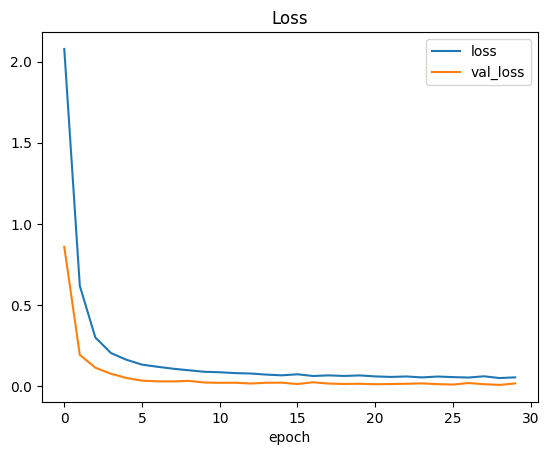

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

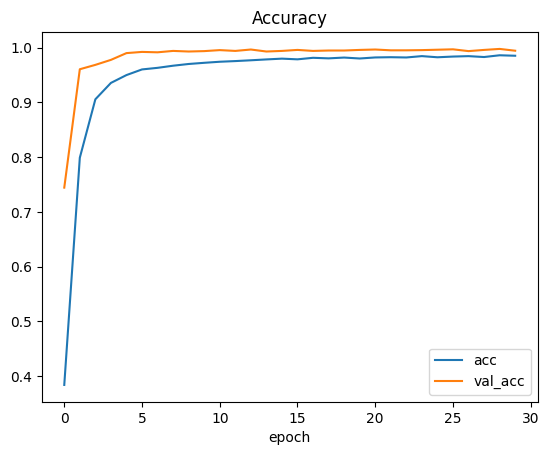

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [14]:
import pandas as pd
from sklearn.metrics import accuracy_score
test = pd.read_csv(data_dir + '/Test.csv')
 
# Extraer las etiquetas y rutas de las imágenes
labels = test["ClassId"].values
imgs = test["Path"].values
 
data = []
 
# Procesar las imágenes
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' + img)
        if image is not None:
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            data.append(np.array(resize_image))
        else:
            print(f"Error reading image {img}")
    except Exception as e:
        print(f"Error in {img}: {e}")
X_test = np.array(data)
X_test = X_test / 255.0
 
# Realizar predicciones
pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)
 
# Asegúrate de que las etiquetas y las predicciones sean del mismo tipo
labels = labels.astype(int)
pred_classes = pred_classes.astype(int)
 
# Calcular la precisión con los datos de prueba
accuracy = accuracy_score(labels, pred_classes)
print('Test Data accuracy: ', accuracy * 100)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test Data accuracy:  97.06254948535233


# Se muestran los resultados

In [16]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        60
           1       0.97      0.96      0.97       720
           2       0.97      1.00      0.98       750
           3       0.98      0.98      0.98       450
           4       0.96      0.99      0.97       660
           5       0.99      0.95      0.97       630
           6       1.00      0.84      0.91       150
           7       0.99      0.95      0.97       450
           8       0.93      0.99      0.96       450
           9       0.94      1.00      0.97       480
          10       1.00      0.98      0.99       660
          11       0.98      1.00      0.99       420
          12       0.99      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       0.96      0.99      0.97       150
          17       0.99    

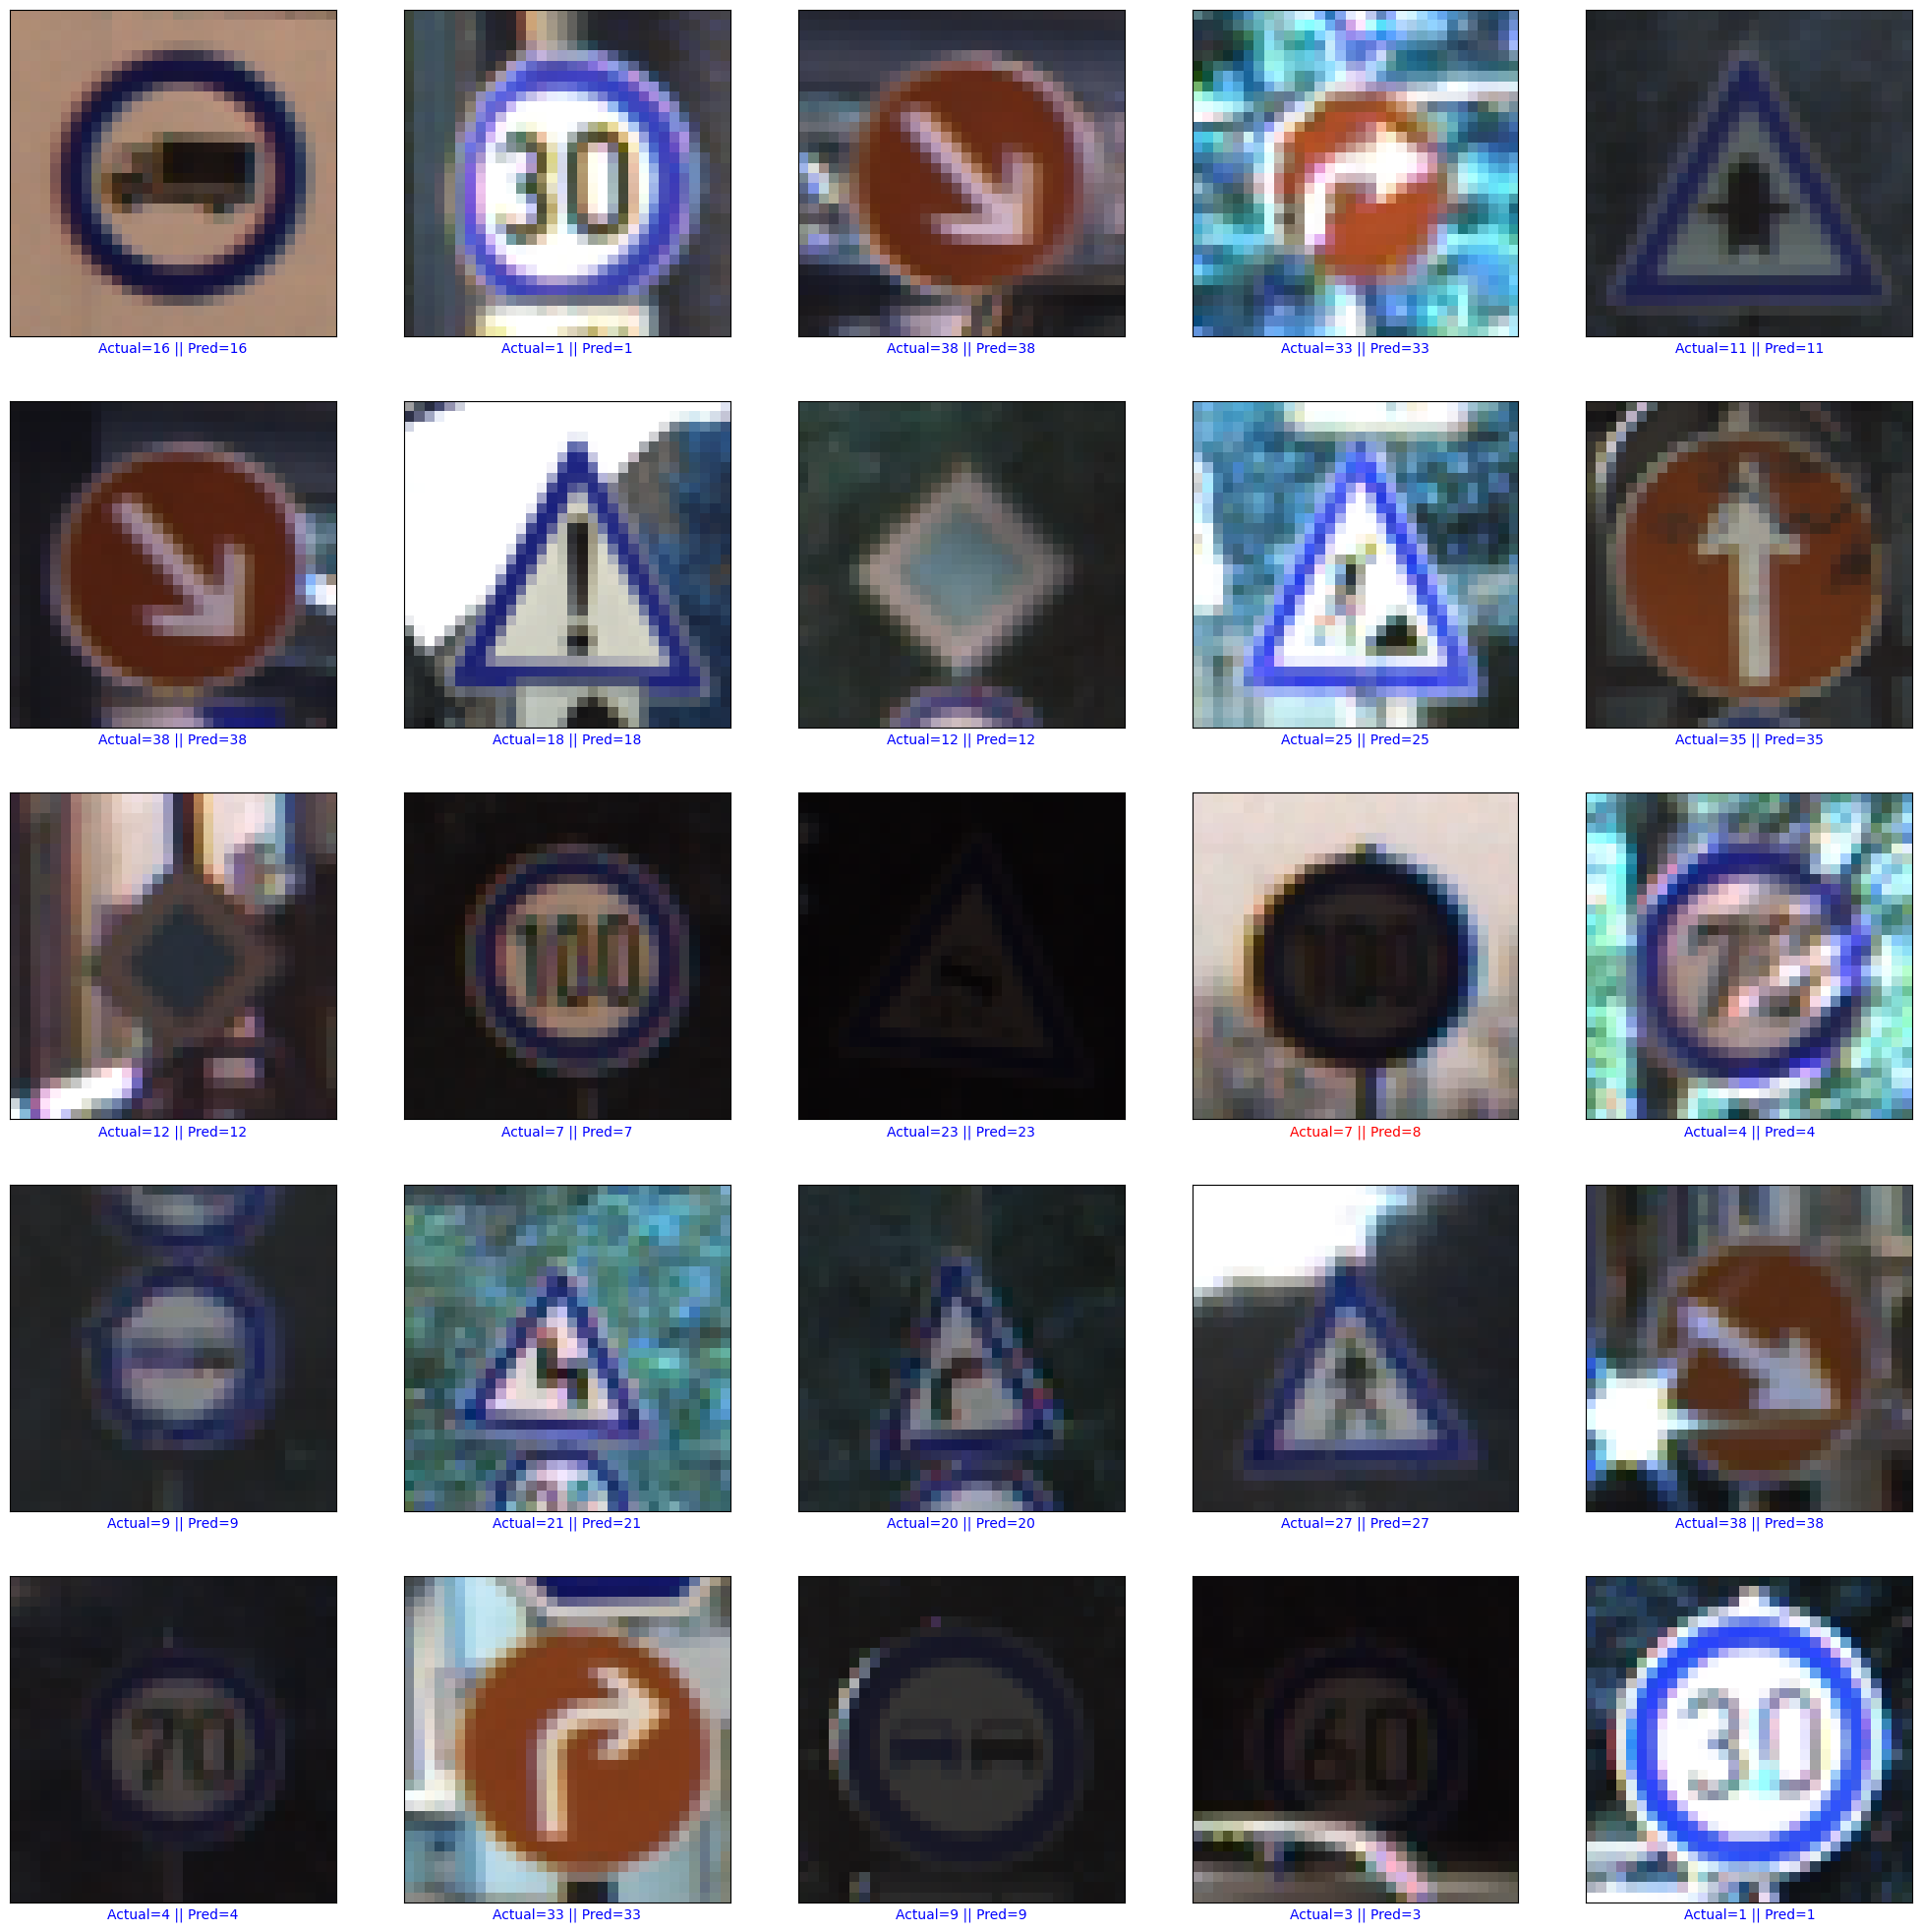

In [17]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'b'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

# Gracias por la atención